# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [119]:
#install spacy in the current conda environment
!pip install spacy


In [120]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



^C
Traceback (most recent call last):
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/runpy.py", line 147, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/site-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/site-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/site-packages/spacy/compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "/Users/ashash/anaconda3/envs/is310/lib/python3.9/site-pack

In [ ]:
!pip install matplotlib

In [ ]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [ ]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [ ]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [ ]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [ ]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [ ]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [ ]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [ ]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [ ]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [ ]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

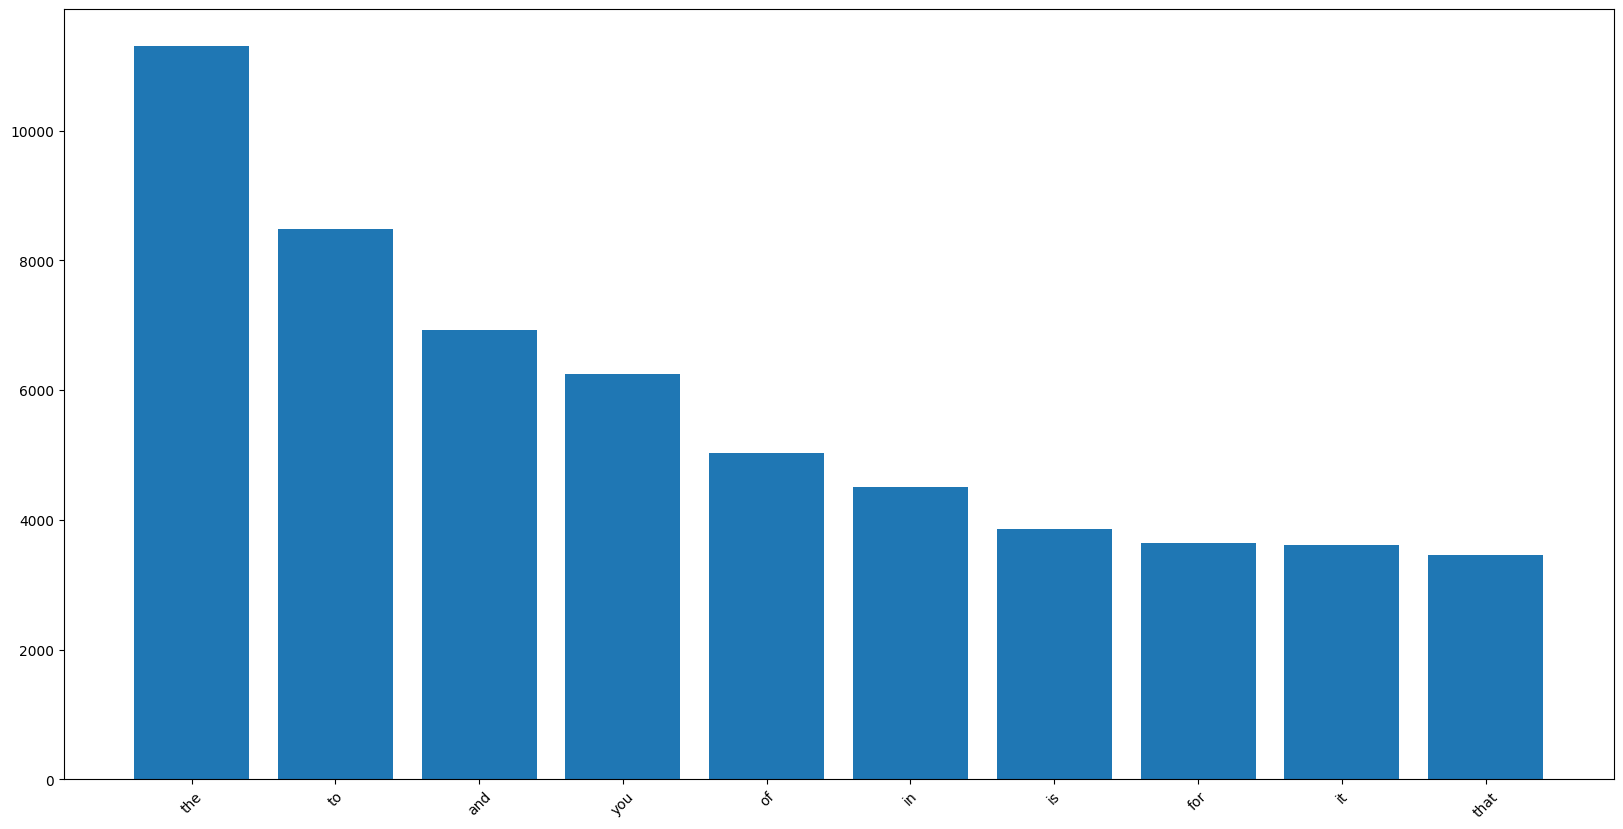

In [ ]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: Most of these words are function words like pronouns, articles, prepositions, and conjunctions. These words are not useful for studying the community because they don't carry significant meaning on their own. 

#### Lemmatization and stopword removal

In [ ]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [ ]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [ ]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [ ]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [ ]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [ ]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

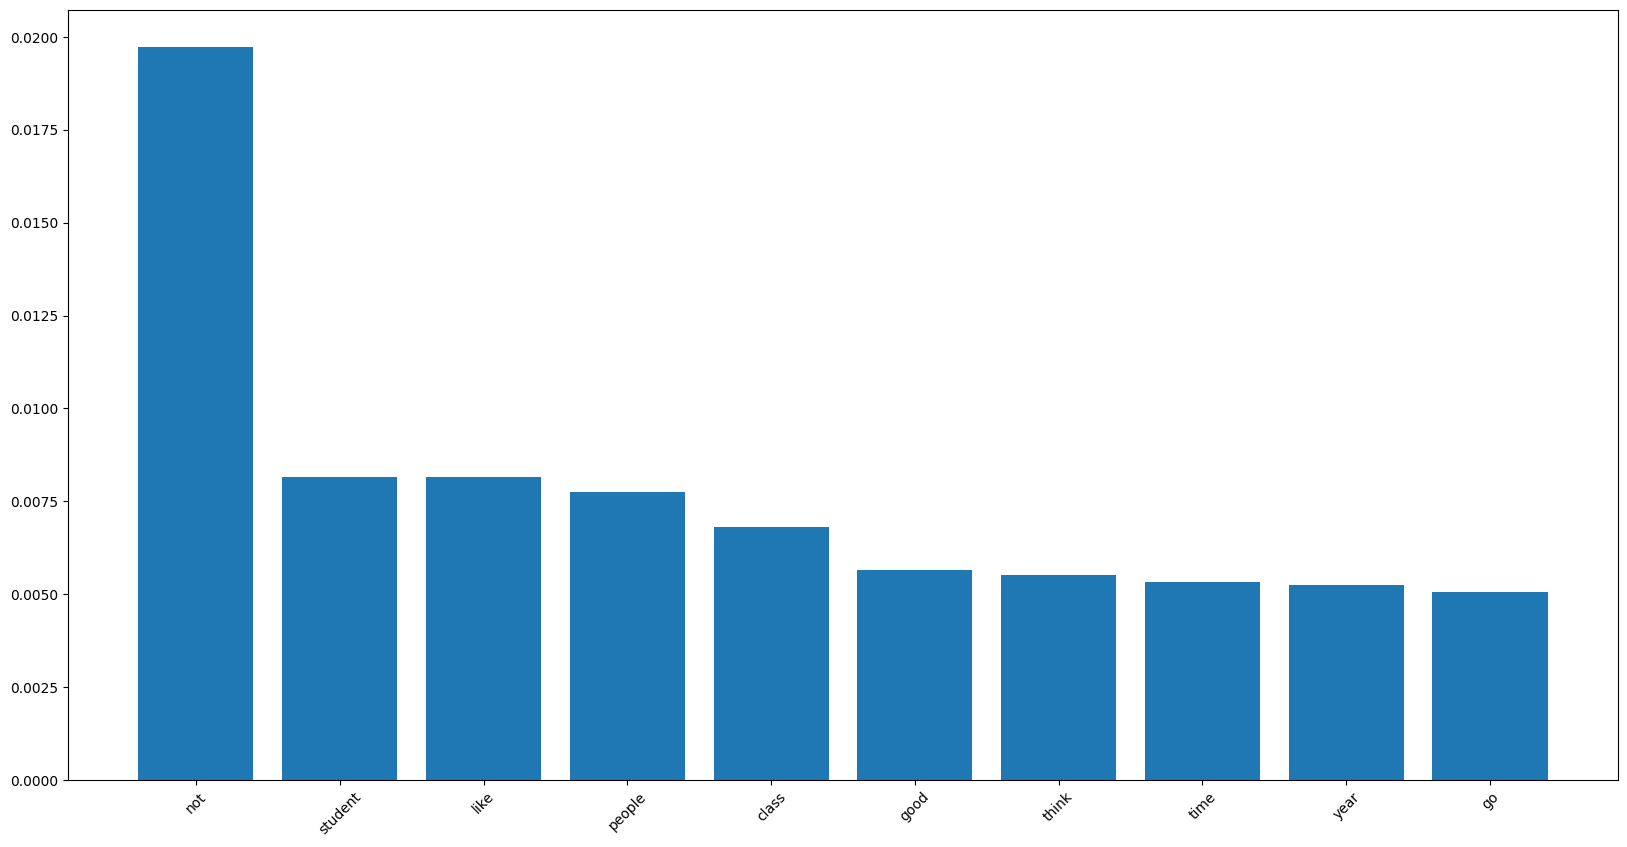

In [ ]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [ ]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

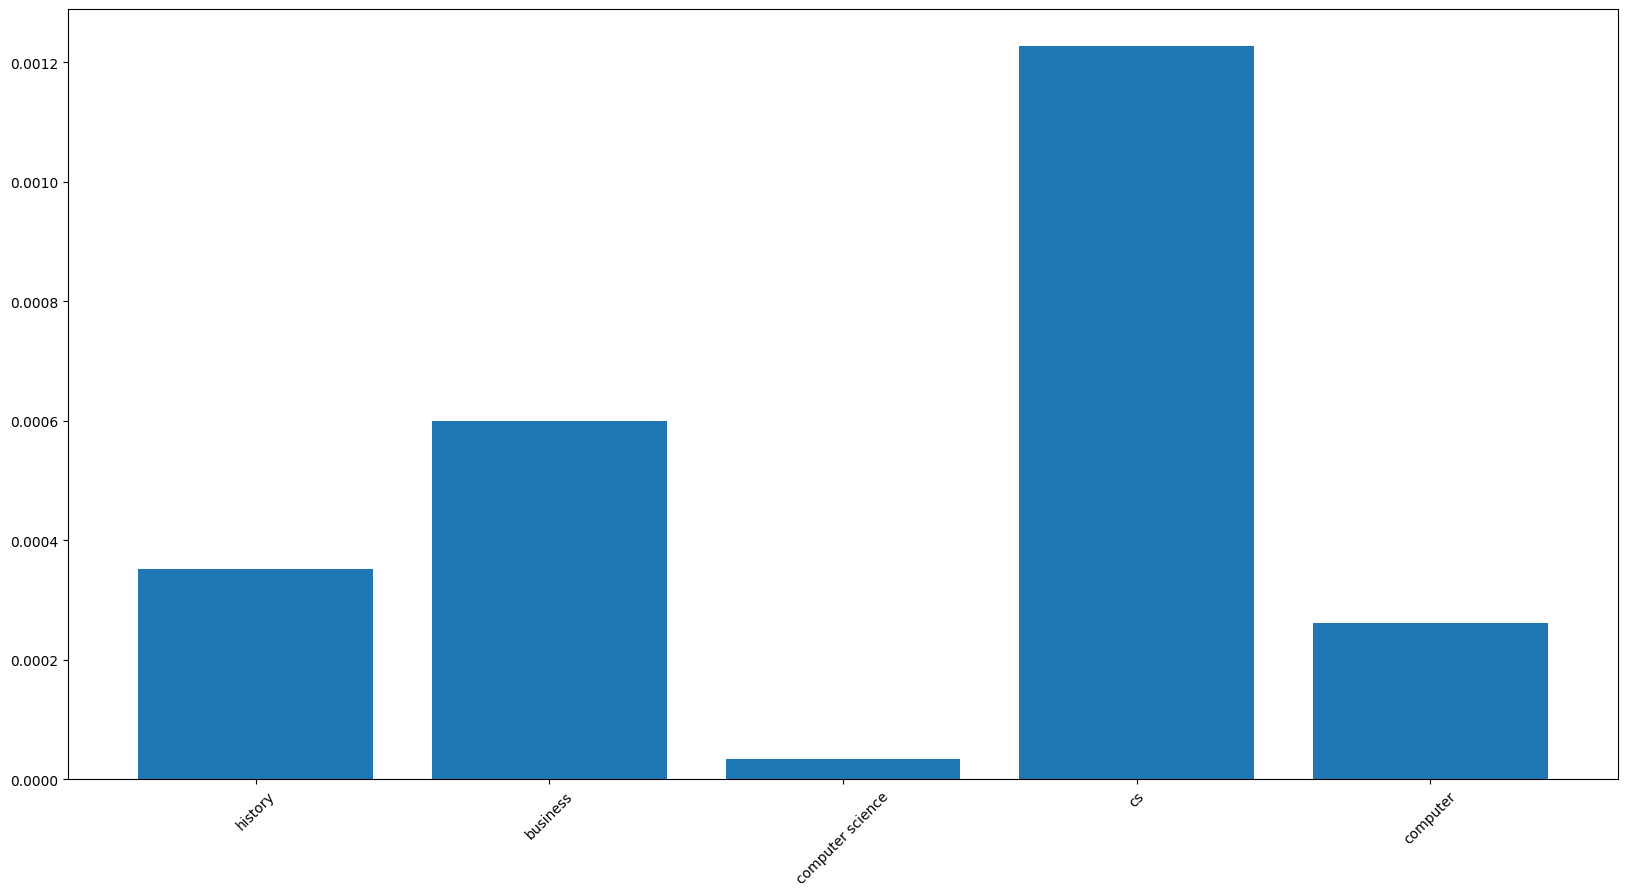

In [ ]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [ ]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

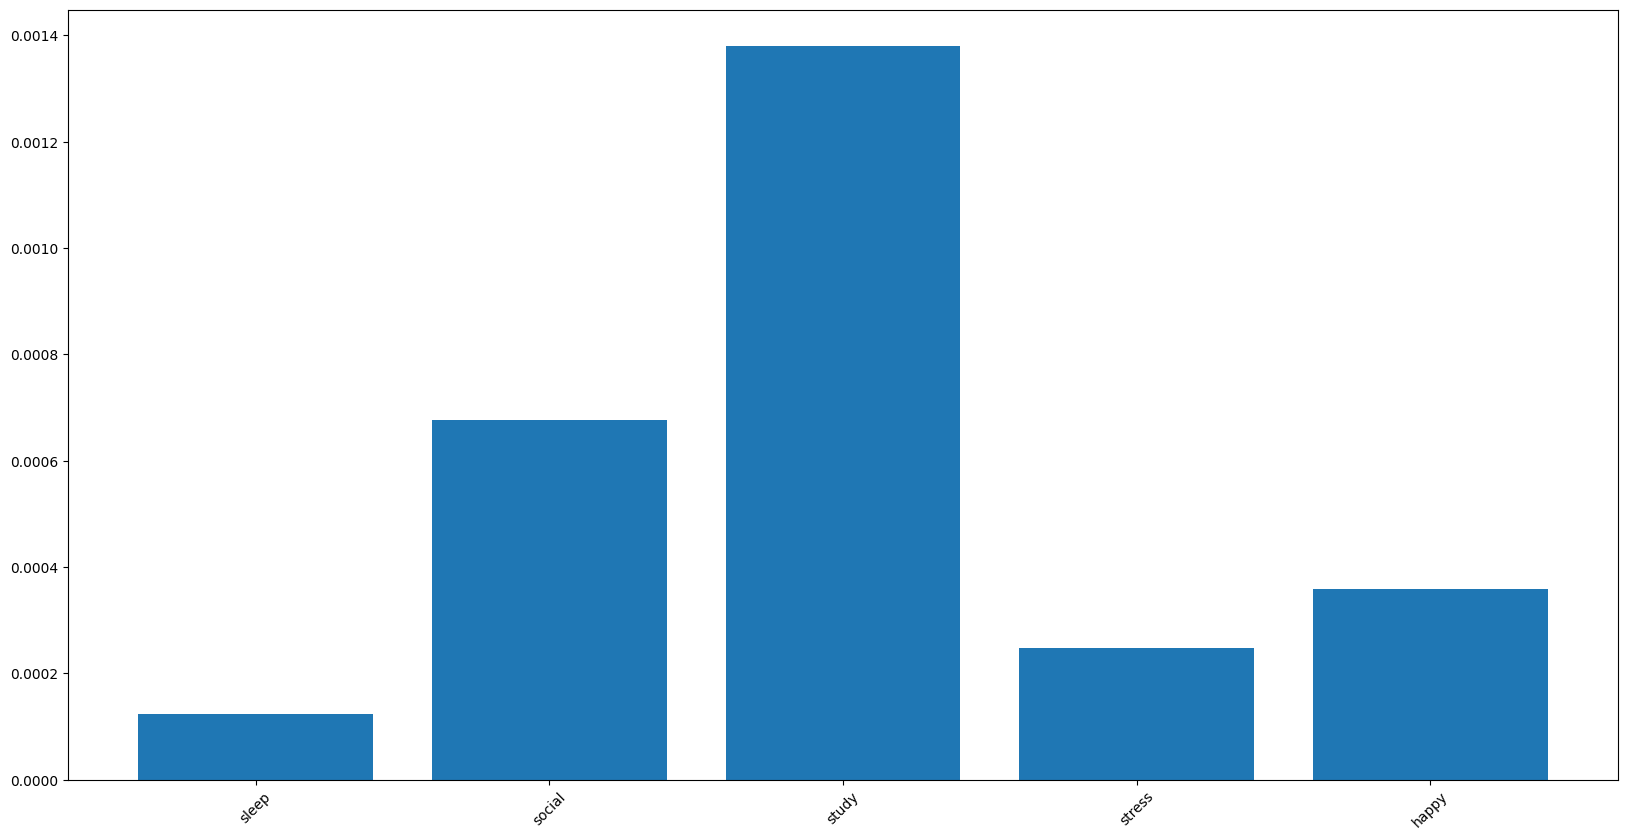

In [ ]:
new_plot_list=word_counts[["sleep", "social", "study", "stress", "happy"]]
plt.figure(figsize=(20,10))
plt.bar(new_plot_list.index, new_plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [ ]:
uiuc=pd.read_csv("uiuc.csv")
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [ ]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [ ]:
uiuc["cleaned_text"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [ ]:
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\n\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [ ]:
vectorizer = CountVectorizer()
uiuc_bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])
uiuc_bag_of_words

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [ ]:
uiuc_bow_df = pd.DataFrame(uiuc_bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
uiuc_bow_df

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


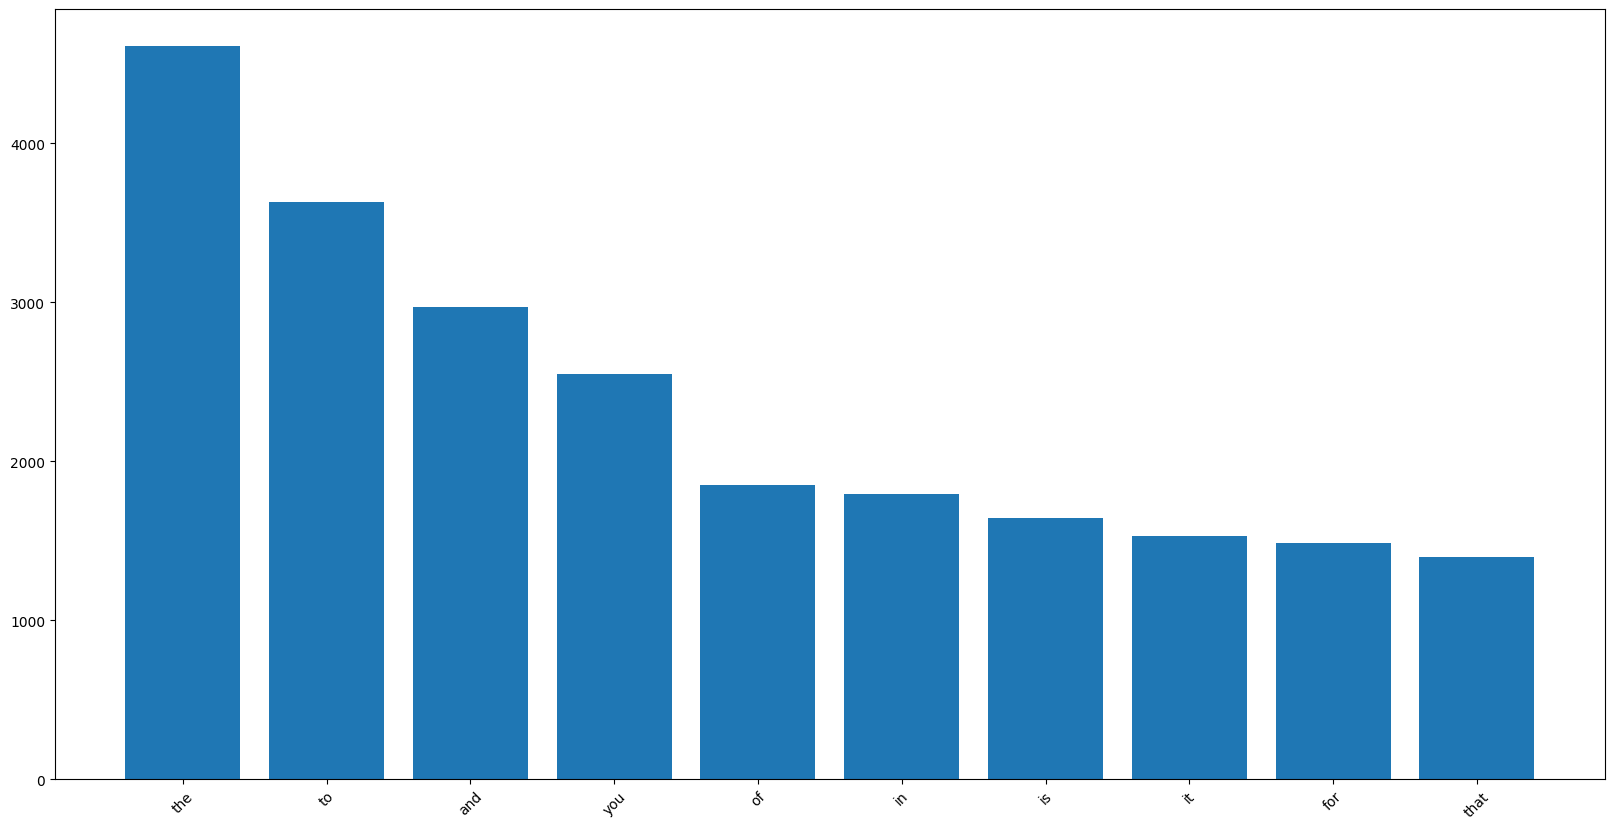

In [ ]:
uiuc_word_counts = uiuc_bow_df.sum()
uiuc_word_counts = uiuc_word_counts.sort_values(ascending=False)
uiuc_word_counts = uiuc_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(uiuc_word_counts.index, uiuc_word_counts.values)
plt.xticks(rotation=45)
plt.show()


In [ ]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)
uiuc_vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
uiuc_bag_of_words = uiuc_vectorizer.fit_transform(uiuc['lemmatized_text'])
uiuc_bag_of_words

<4725x3891 sparse matrix of type '<class 'numpy.int64'>'
	with 49429 stored elements in Compressed Sparse Row format>

In [ ]:
uiuc_bow_df = pd.DataFrame(uiuc_bag_of_words.toarray(), columns=uiuc_vectorizer.get_feature_names_out())
uiuc_word_counts = uiuc_bow_df.sum()
uiuc_word_counts = uiuc_word_counts.sort_values(ascending=False)
uiuc_word_counts

not               1205
like               534
people             481
good               388
time               376
                  ... 
not personally       3
not person           3
not park             3
not open             3
ab                   3
Length: 3891, dtype: int64

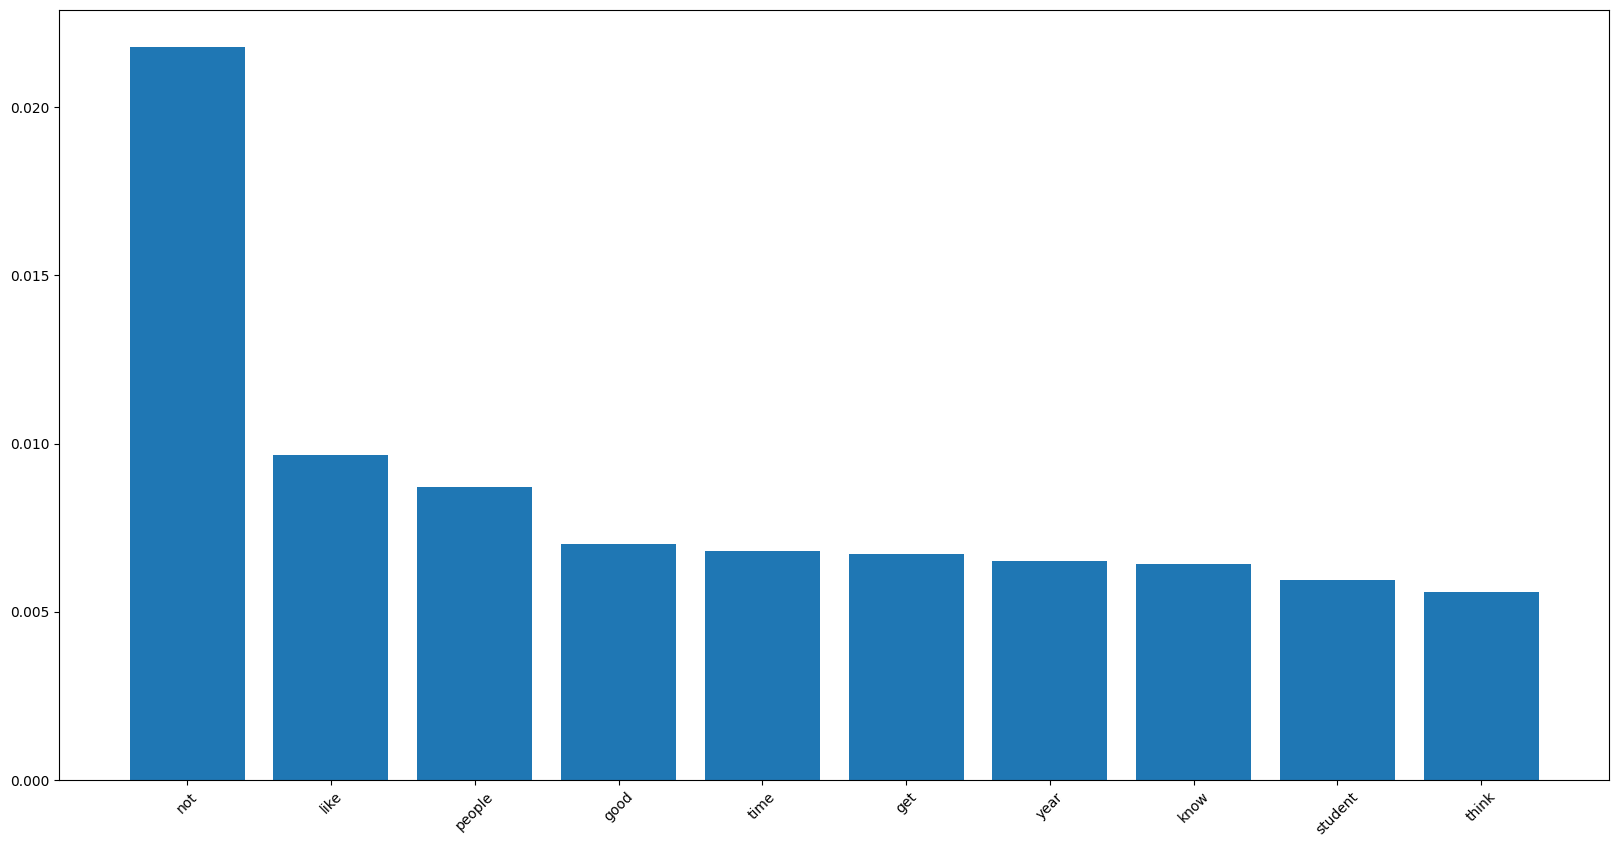

In [ ]:
uiuc_word_counts = uiuc_word_counts / uiuc_word_counts.sum()
uiuc_plot_list = uiuc_word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(uiuc_plot_list.index, uiuc_plot_list.values)
plt.xticks(rotation=45)
plt.show()

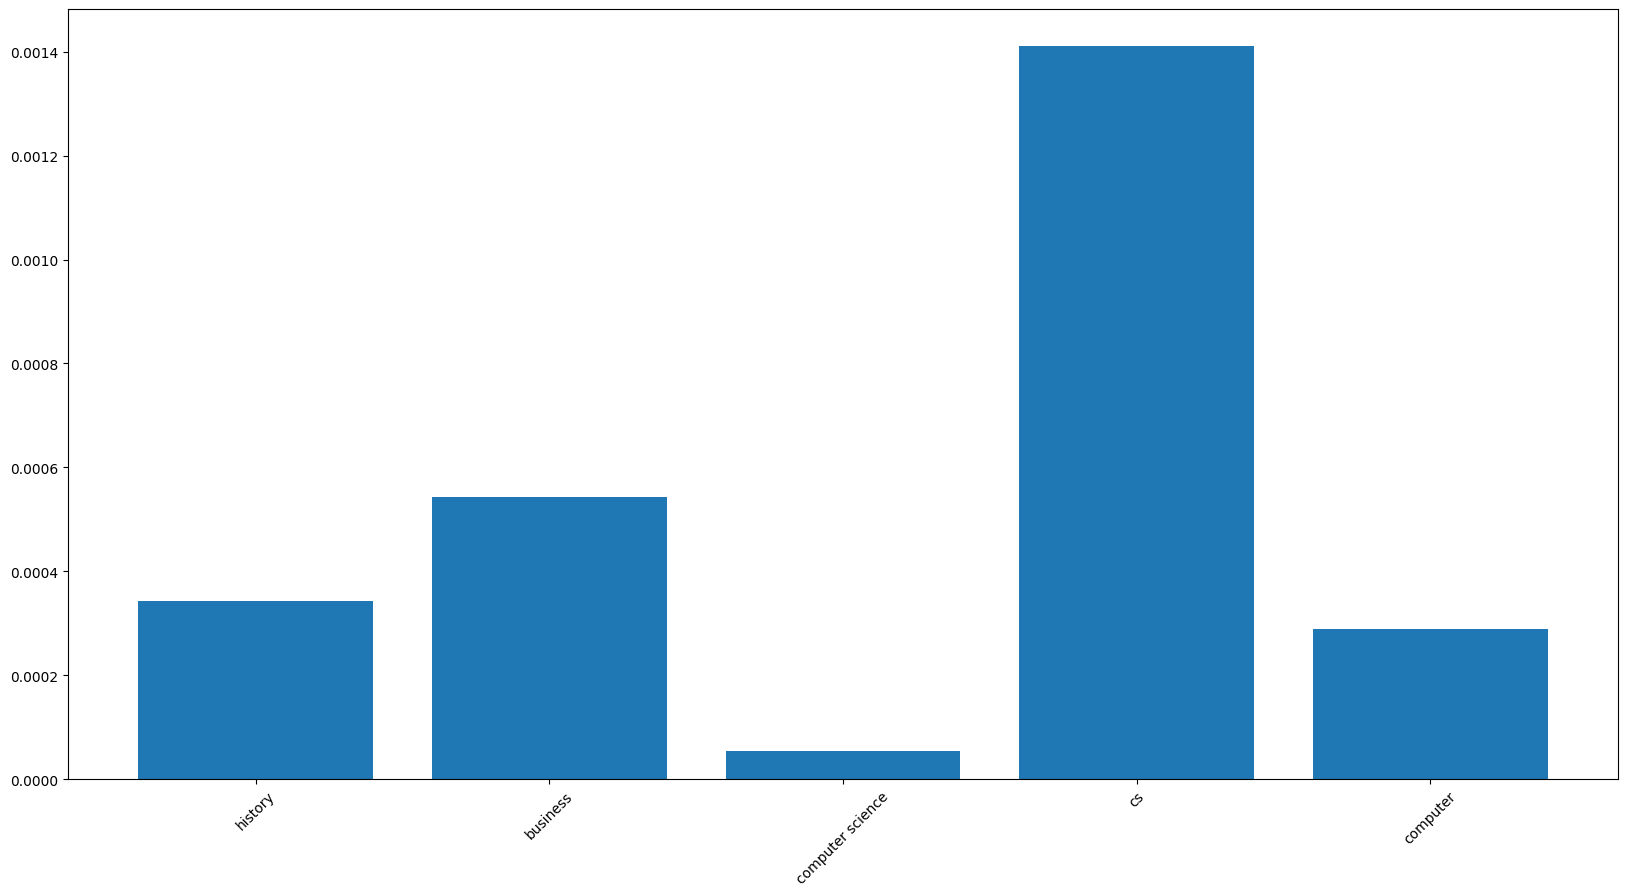

In [ ]:
uiuc_plot_list=uiuc_word_counts[["history", "business", "computer science", "cs", "computer"]]
plt.figure(figsize=(20,10))
plt.bar(uiuc_plot_list.index, uiuc_plot_list.values)
plt.xticks(rotation=45)
plt.show()

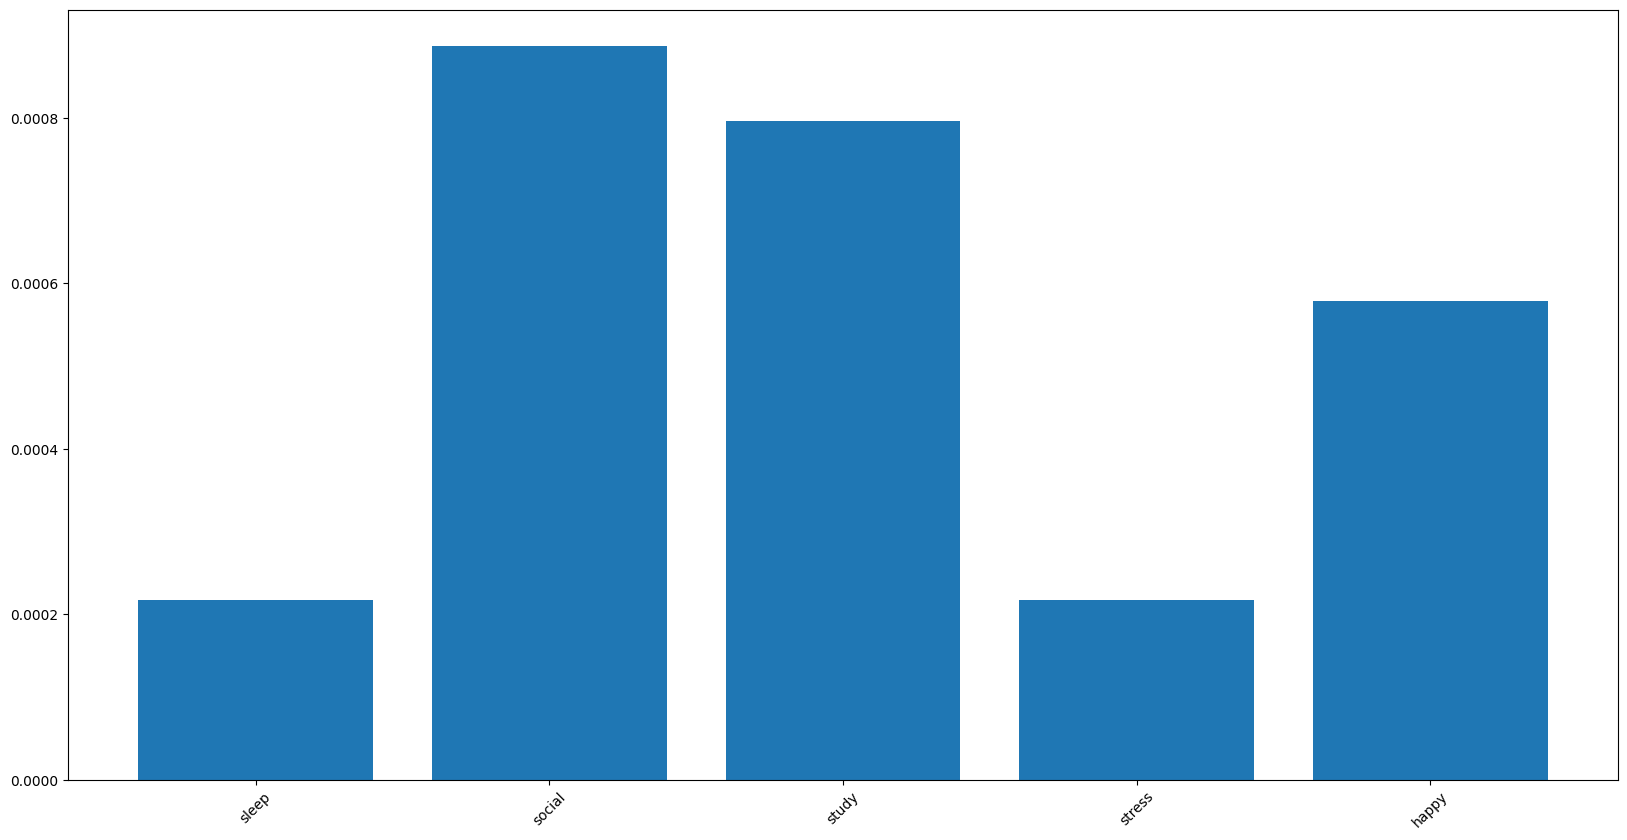

In [ ]:
uiuc_new_plot_list=uiuc_word_counts[["sleep", "social", "study", "stress", "happy"]]
plt.figure(figsize=(20,10))
plt.bar(uiuc_new_plot_list.index, uiuc_new_plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

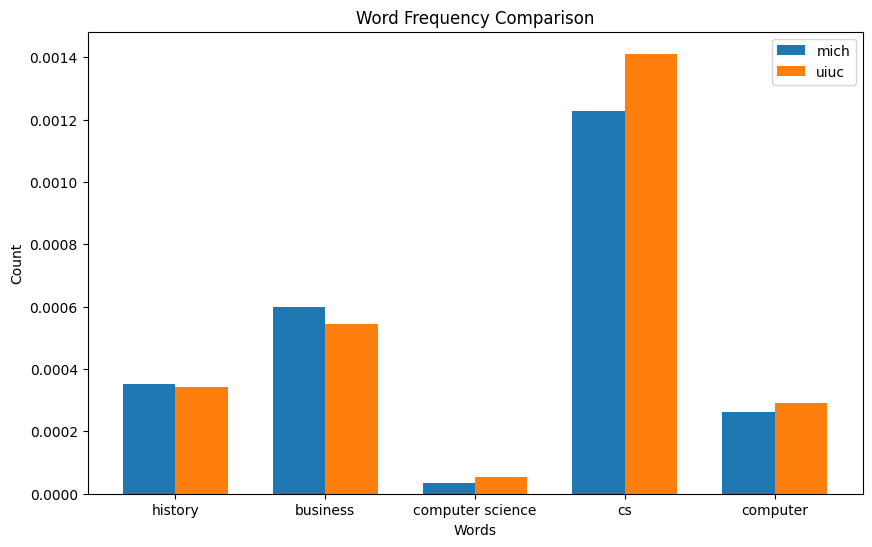

In [ ]:
num_items = len(plot_list)
width = 0.35
indices = np.arange(num_items)

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(indices, plot_list, width=width, label='mich', align='center')

ax.bar(indices + width, uiuc_plot_list, width=width, label='uiuc', align='center')

ax.set_xlabel('Words')
ax.set_ylabel('Count')
ax.set_title('Word Frequency Comparison')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(["history", "business", "computer science", "cs", "computer"])

ax.legend()

plt.show()

Those words usually are usually considered as subject names. By comparing the words, the word "CS" is being used for a significant higher frequency than other words in both uiuc and umich which means shows that either students in CS major are more active online or that cs major is a strong major in both schools. The second higher frequency word is "business" which means that business majors are also popular in both school, but umich as a slightly higher frequency than uiuc. 

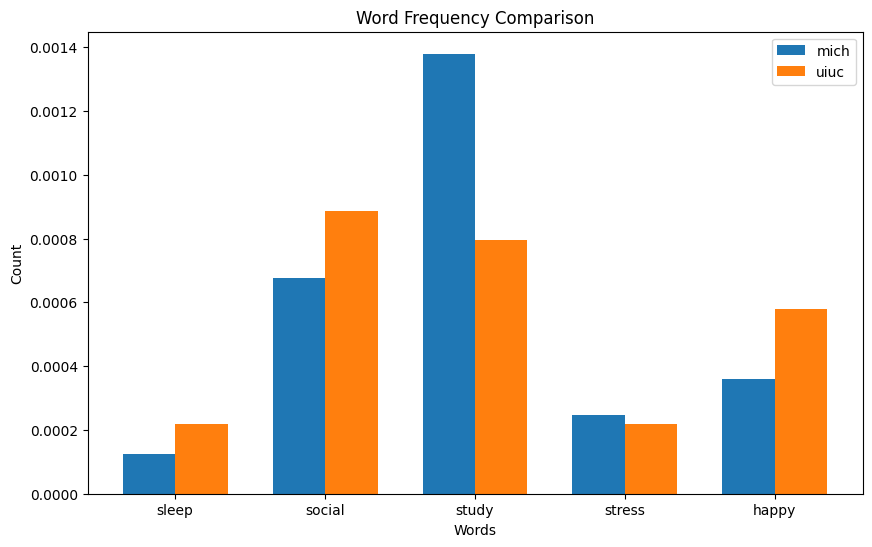

In [ ]:
num_items = len(plot_list)
width = 0.35
indices = np.arange(num_items)

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(indices, new_plot_list, width=width, label='mich', align='center')

ax.bar(indices + width, uiuc_new_plot_list, width=width, label='uiuc', align='center')

ax.set_xlabel('Words')
ax.set_ylabel('Count')
ax.set_title('Word Frequency Comparison')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(["sleep", "social", "study", "stress", "happy"])

ax.legend()

plt.show()

For the other five words, I chose words that represents how students distribute their attention in daily life. The graph shows that umich students have a much higher frequency of using the word study and slightly higher use in stress, which might indicate that umich students have more workload. On the other hands, uiuc students seem to focus more on their social life comparing to umich students. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [ ]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
3653,3653,2024-08-17 05:47:52,40,💅🔨,tylerfioritto,5,0
5468,5468,2024-07-30 03:27:36,5,"Depending on your location, you can also park ...",RunningEncyclopedia,1,0
606,606,2024-09-01 01:38:18,4,The biggest thing is repetition. Repetition is...,Subject_Willow,1,0
3733,3733,2024-08-16 15:41:51,10,I use a 529 to pay tuition as well! If you log...,Nin_cubed,28,0


In [121]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)


In [130]:
#create a bag of words representation with count vectorizer
data_vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
data_bag_of_words = data_vectorizer.fit_transform(data['lemmatized_text'])
X = data_bag_of_words
y = data['label']



In [131]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [133]:
#report the accuracy of the model
accuracy_score(y_test, y_pred)

0.7095238095238096

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [134]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

model.fit(data_bag_of_words, data['label'])
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model on the test set:", accuracy)


Accuracy of the model on the test set: 0.8973544973544973


The accuracy is higher because the model has already captured the relationship and pattern between the bag of words and the label. 

#### Part 3: Examine the top features of your model using the following code

In [143]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

coefficients = model.coef_[0]
X.columns = data_vectorizer.get_feature_names_out()
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

top_10_positive = coeff_df.sort_values(by='Coefficient', ascending=False).head(10)
top_10_negative = coeff_df.sort_values(by='Coefficient', ascending=True).head(10)
print("Top 10 Positive Coefficients:\n", top_10_positive)
print("\nTop 10 Negative Coefficients:\n", top_10_negative)


Top 10 Positive Coefficients:
         Feature  Coefficient
7633       uiuc     2.721112
7740     urbana     2.215535
3333   illinois     2.135898
6159       rsos     2.104260
3330     illini     2.005314
2886   grainger     1.932471
1540   danville     1.731389
7496        tow     1.728654
3732        las     1.691562
951   champaign     1.688141

Top 10 Negative Coefficients:
        Feature  Coefficient
4377  michigan    -3.053908
7644     umich    -2.562929
7639        um    -2.210392
2518    fresno    -2.172743
1970       eec    -2.141113
4297     mcard    -2.065396
6144      ross    -2.009997
1716      diag    -1.947049
7728      uofm    -1.897167
438     august    -1.844764


In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
Yes, the words seems to make sense because the words that have higher coefficients are related to either uiuc or the majors at uiuc. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [147]:
!pip install gensim

In [172]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

corpus = Sparse2Corpus(uiuc_bag_of_words, documents_columns=False)

id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [173]:
corpus

In [164]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

lda_model.print_topics()

2024-09-25 00:04:48,519 : INFO : using symmetric alpha at 0.1
2024-09-25 00:04:48,522 : INFO : using symmetric eta at 0.1
2024-09-25 00:04:48,525 : INFO : using serial LDA version on this node
2024-09-25 00:04:48,538 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 4725 documents, updating model once every 2000 documents, evaluating perplexity every 4725 documents, iterating 50x with a convergence threshold of 0.001000
2024-09-25 00:04:48,539 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-09-25 00:04:48,555 : INFO : PROGRESS: pass 0, at document #2000/4725
2024-09-25 00:04:49,214 : INFO : merging changes from 2000 documents into a model of 4725 documents
2024-09-25 00:04:49,221 : INFO : topic #5 (0.100): 0.013*"friendship" + 0.013*"debug" + 0.011*"connected" + 0.010*"artwork" + 0.009*"canvasillinois" + 0.007*"guitar" + 0.007*"cases" + 0.006*"fran

[(0,
  '0.040*"governments" + 0.011*"folk" + 0.010*"bingo" + 0.010*"debug" + 0.010*"carle" + 0.010*"discouraged" + 0.009*"folks" + 0.008*"finding" + 0.007*"cases" + 0.006*"copied"'),
 (1,
  '0.018*"cafes" + 0.013*"debug" + 0.012*"dishwasher" + 0.011*"finding" + 0.011*"guitar" + 0.009*"ethnically" + 0.009*"carle" + 0.008*"broaden" + 0.008*"community" + 0.007*"cabinet"'),
 (2,
  '0.010*"booster" + 0.010*"aoe" + 0.010*"debug" + 0.008*"gamemajor" + 0.007*"checkclean" + 0.007*"divestment" + 0.006*"freaking" + 0.006*"games" + 0.006*"carle" + 0.006*"bet"'),
 (3,
  '0.025*"debug" + 0.015*"conversation" + 0.014*"freaking" + 0.013*"community" + 0.010*"broaden" + 0.008*"dang" + 0.008*"contactget" + 0.008*"governmentlike" + 0.007*"dishwasher" + 0.006*"america"'),
 (4,
  '0.037*"debug" + 0.008*"friendship" + 0.007*"guitar" + 0.007*"connected" + 0.007*"games" + 0.007*"artwork" + 0.007*"canvasillinois" + 0.007*"enigma" + 0.006*"community" + 0.006*"dishwasher"'),
 (5,
  '0.016*"friendship" + 0.014*"ar

In [170]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint = uiuc["text"].iloc[30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

Pm’d


In [174]:
lda_model.get_document_topics(corpus[30])

[(0, 0.1),
 (1, 0.1),
 (2, 0.1),
 (3, 0.1),
 (4, 0.1),
 (5, 0.1),
 (6, 0.1),
 (7, 0.1),
 (8, 0.1),
 (9, 0.1)]

In [161]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

In [175]:
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

In [176]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9
1669,0.004557,0.004558,0.004559,0.958983,0.004557,0.004557,0.004558,0.004557,0.004558,0.004557
1428,0.004585,0.004584,0.004587,0.958739,0.004584,0.004585,0.004584,0.004584,0.004584,0.004584
509,0.005559,0.005560,0.005559,0.949967,0.005559,0.005559,0.005559,0.005559,0.005559,0.005560
16,0.005571,0.005570,0.005573,0.949865,0.005570,0.005570,0.005571,0.005571,0.005570,0.005571
1888,0.005916,0.005915,0.005915,0.946760,0.005915,0.005915,0.005916,0.005915,0.005916,0.005916
...,...,...,...,...,...,...,...,...,...,...
5079,0.188922,0.077532,0.054354,0.000709,0.039656,0.195069,0.241351,0.000709,0.126706,0.074993
5420,0.211251,0.127921,0.144145,0.000664,0.020741,0.104170,0.269018,0.010268,0.021148,0.090675
1366,0.286674,0.426566,0.000572,0.000572,0.239071,0.000572,0.000572,0.000572,0.044255,0.000572
8004,0.208364,0.066217,0.383521,0.000524,0.135371,0.080693,0.000524,0.016640,0.038754,0.069392


In [179]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=uiuc["text"][1428]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

Also junior in compE (23 cuz i left the school for 2 years to do military
service back home). Currently in very similar position. Feel free to dm!


In [182]:
pd.set_option('display.max_colwidth', None)
toprint=uiuc["text"][1669]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

Pretty sure they got disc drives and blank discs at Walmart. Look up a free cd
burning software online and get mp3s of whatever songs you want on the cd and
you should be set


In [183]:
pd.set_option('display.max_colwidth', None)
toprint=uiuc["text"][509]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

The company needs to start charging people for leaving them in places like this.
Like $5 for every offense and raise it up after the 3rd time.
